1.⁠ ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

import pandas as pd

import matplotlib.pyplot as plt

# Read the dataset

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"

df = pd.read_csv(url)

----- Write your code below this after running above above code-----------



2.⁠ ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a numerical feature(Pedestrians) and a non-numerical feature(Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers( 0,1,2..). This technique is called One-hot encoding.

-Correlation matrices may not always be the most suitable visualization method for relationships involving categorical data points, nonetheless this was given as a question to help you understand the concept better.

3.⁠ ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

-Students can also show plots analyzing activity.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import ssl
import urllib.request

# Read the dataset

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
context = ssl._create_unverified_context()
response = urllib.request.urlopen(url, context=context)

df = pd.read_csv(response)
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [ ]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['hour'] = df['hour_beginning'].dt.hour
df['month'] = df['hour_beginning'].dt.month
df['date'] = df['hour_beginning'].dt.date
df['day_name'] = df['hour_beginning'].dt.day_name()
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
df = df[df['day_name'].isin(weekday_order)]

pedestrian_counts = df.groupby('day_name')['Pedestrians'].sum()
print(pedestrian_counts) 


day_name
Friday       1588068
Monday       1481435
Thursday     1370880
Tuesday      1394963
Wednesday    1310900
Name: Pedestrians, dtype: int64


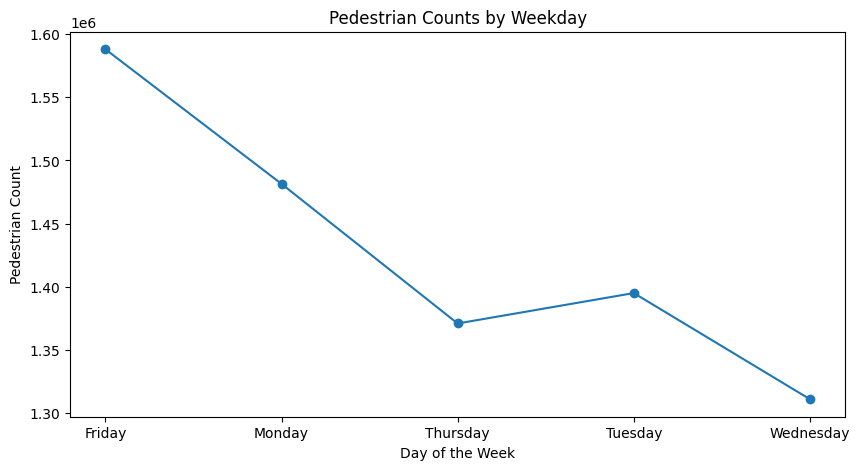

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(pedestrian_counts.index, pedestrian_counts.values, marker='o', linestyle='-')
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Count')
plt.title('Pedestrian Counts by Weekday')
plt.show()

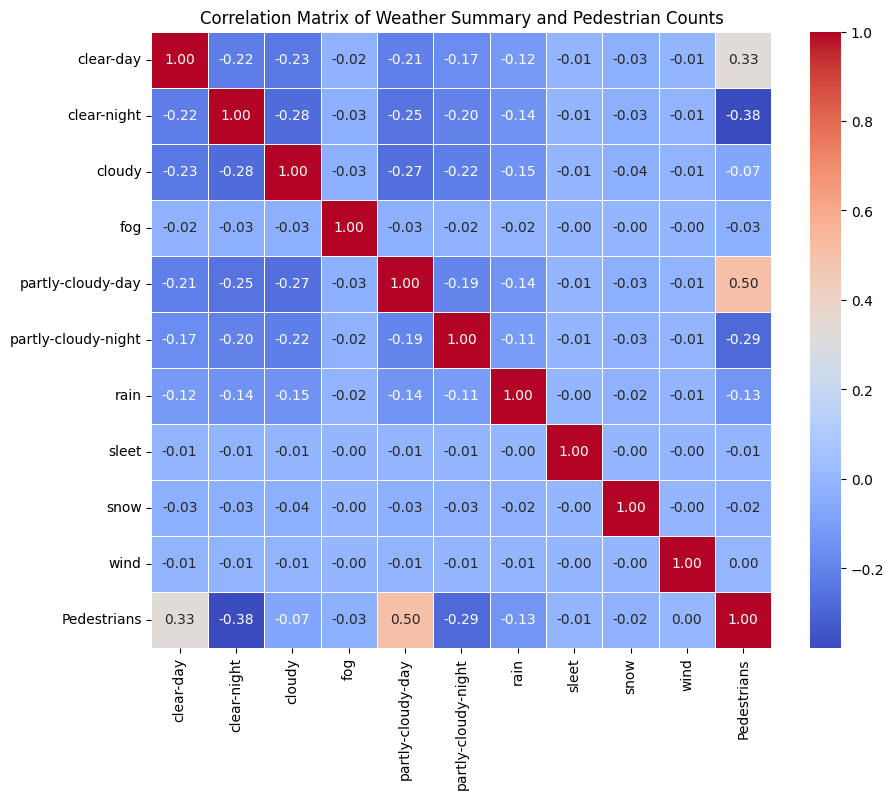

In [44]:
import seaborn as sns

# Filter data for the Brooklyn Bridge and year 2019
df_2019 = df[(df['location'] == 'Brooklyn Bridge') & (df['hour_beginning'].dt.year == 2019)]

# Perform one-hot encoding for 'weather_summary'-* Since weather summary is a non-numerical column, we have to encode it to find how it correlates with another column
weather_summary_encoded = pd.get_dummies(df_2019['weather_summary'])

# Concatenate encoded weather summary with pedestrian counts
encoded_data = pd.concat([weather_summary_encoded, df_2019['Pedestrians']], axis=1)

# Calculate correlation matrix
correlation_matrix = encoded_data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Weather Summary and Pedestrian Counts')
plt.show()


In [45]:
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Create new column to store time of day categories
df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)

# Aggregating pedestrian count throughout the day
ped_counts_agg = df.groupby('time_of_day')['Pedestrians'].sum()

print("Pedestrian Activity Patterns:")
print(ped_counts_agg)

Pedestrian Activity Patterns:
time_of_day
Afternoon    4360577
Evening      1116599
Morning      1637990
Night          31080
Name: Pedestrians, dtype: int64
